<h1>Домашнее задание к вебинару 2<h1>

#### Задание 1. Опишите - какой результат нейросети получен в зависимости от:
* числа нейронов в слое (для 2-х слойной сети),  
* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).  
* фиксируйте для тренировочного и тестового набора метрики accuracy.

In [38]:
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
import numpy as np

In [39]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import CategoricalCrossentropy
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [40]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 9


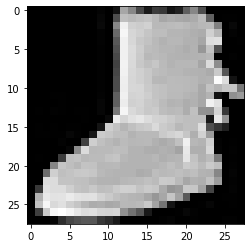

In [41]:
ind = np.random.randint(0, X_train.shape[0])
plt.figure(figsize = (8,4))
plt.imshow(X_train[ind].reshape([28,28]), cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [42]:
X_train.min(), X_train.max()

(0, 255)

Т. к. нейронные сети работают на линейных моделях, произведем нормирование данных

In [43]:
# Нормирование
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

Вытянем двухмерный массив характеристик изображений в длинный вектор значений

In [44]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

Подготовка меток классов

In [45]:
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [46]:
from keras.utils.np_utils import to_categorical


y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Создадим нейронную сеть и изучим зависимость результата от параметров**

In [49]:
n = [5, 7, 10, 12, 15, 20, 25, 50, 70, 100]

for inner in n:
  
    model = Sequential(name='my_model')
    model.add(Dense(100, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(inner, activation='relu'))
    model.add(Dense(10, activation='sigmoid'))

  # Компилируем сеть с оптимизатором , функцией потерь и метрикой

    model.compile(
    optimizer='adam', # оптимизатор
    loss=CategoricalCrossentropy(), # функция потерь
    metrics=['accuracy'], # метрика
  ) 

  # Обучаем сеть

    history = model.fit(  
      X_train,
      y_train,
      epochs=10,
      batch_size=10, 
      validation_split=0.2,
      verbose=0
  )


    # Оцениваем качество

    test_loss, test_acc = model.evaluate(X_test, y_test)

    print(f'Количество нейронов во внутреннем слое двухслойной сети {inner}: '
         f'Accuracy на трейне - {history.history.get("accuracy")[-1]:.4f}; '
        f'Accuracy на тесте - {test_acc:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8654
Количество нейронов во внутреннем слое двухслойной сети 5: Accuracy на трейне - 0.8975; Accuracy на тесте - 0.8654
313/313 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8677
Количество нейронов во внутреннем слое двухслойной сети 7: Accuracy на трейне - 0.9037; Accuracy на тесте - 0.8677
313/313 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8739
Количество нейронов во внутреннем слое двухслойной сети 10: Accuracy на трейне - 0.9040; Accuracy на тесте - 0.8739
313/313 [==============================] - 1s 2ms/step - loss: 0.3743 - accuracy: 0.8730
Количество нейронов во внутреннем слое двухслойной сети 12: Accuracy на трейне - 0.9030; Accuracy на тесте - 0.8730
313/313 [==============================] - 1s 2ms/step - loss: 0.3542 - accuracy: 0.8778
Количество нейронов во внутреннем слое двухслойной сети 15: Accuracy на трейне - 0.9037; Accu

**Вывод**: с увеличением количества нейронов на внутреннем слое двухслойной сети мерика accuracy растет незначительно, однако на трейне она растет быстрее, чем на тесте, из-за чего можно отметить наличие небольшого переобучения и допустить , что оно усилится при дальнейшем увеличении количества нейронов. Так же периодически набдлюдается небольшое переобучение. Однако с количеством слоев = 100 получается наилучший результат, остановимся на этом количестве нейронов скрытого слоя.

Теперь изучим зависимост метрики accuracy от количества слоев

In [60]:
# Создадим (для удобства) функцию для компиляции, обучения нейронной сети и вывода значения метрики accuracy

def evaluate_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, epochs = 12):
    #Компиляция
    model.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

    history = model.fit(X_train, y_train, 
                          batch_size = 100,
                          epochs = epochs, 
                          verbose = 0,
                          validation_split = 0.2)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)

    print(f'Model {model} -  Accuracy train: {history.history["accuracy"][-1]:.4f}, accuracy test: {test_acc:.4f}')

    return history.history["accuracy"][-1], test_acc

In [61]:
result = {'n_layers': [],
          'train_acc': [],
          'test_acc': []}

In [62]:
# двухслойная модель (входной слой в данном случае не учитываем в подсчете количества слоев)
model_2 = Sequential([
    Dense(100, input_shape=(28 * 28,), activation='relu'),                  
    Dense(80, activation='relu'),
    Dense(10, activation='sigmoid')
])
train_acc2, test_acc2 = evaluate_model(model_2, X_train, y_train, X_test, y_test)

#Занесем данные в словарь
result['n_layers'].append(2)
result['train_acc'].append(train_acc2)
result['test_acc'].append(test_acc2)



# трехслойная модель
model_3 = Sequential([
    Dense(100, input_shape=(28 * 28,), activation='relu'),                  
    Dense(90, activation='relu'),
    Dense(80, activation='relu'),
    Dense(10, activation='sigmoid')
])

train_acc3, test_acc3 = evaluate_model(model_3, X_train, y_train, X_test, y_test)

#Занесем данные в словарь
result['n_layers'].append(3)
result['train_acc'].append(train_acc2)
result['test_acc'].append(test_acc2)


# пятислойная модель
model_5 = Sequential([
    Dense(100, input_shape=(28 * 28,), activation='relu'),  
    Dense(90, activation='relu'),                
    Dense(80, activation='relu'),
    Dense(70, activation='relu'),
    Dense(60, activation='relu'),
    Dense(10, activation='sigmoid')
])

train_acc5, test_acc5 = evaluate_model(model_5, X_train, y_train, X_test, y_test)

#Занесем данные в словарь
result['n_layers'].append(5)
result['train_acc'].append(train_acc5)
result['test_acc'].append(test_acc5)


# десятислойная модель
model_10 = Sequential([
    Dense(100, input_shape=(28 * 28,), activation='relu'), 
    Dense(95, activation='relu'),                 
    Dense(95, activation='relu'),
    Dense(90, activation='relu'),
    Dense(85, activation='relu'),
    Dense(80, activation='relu'),
    Dense(75, activation='relu'),
    Dense(70, activation='relu'),
    Dense(65, activation='relu'),
    Dense(60, activation='relu'),
    Dense(10, activation='sigmoid')
])

train_acc10, test_acc10 = evaluate_model(model_10, X_train, y_train, X_test, y_test)

#Занесем данные в словарь
result['n_layers'].append(10)
result['train_acc'].append(train_acc10)
result['test_acc'].append(test_acc10)



Model <keras.engine.sequential.Sequential object at 0x7f746c09f310> -  Accuracy train: 0.9107, accuracy test: 0.8822
Model <keras.engine.sequential.Sequential object at 0x7f74744ae790> -  Accuracy train: 0.9121, accuracy test: 0.8798
Model <keras.engine.sequential.Sequential object at 0x7f745ad883d0> -  Accuracy train: 0.9109, accuracy test: 0.8727
Model <keras.engine.sequential.Sequential object at 0x7f745fd27c10> -  Accuracy train: 0.9023, accuracy test: 0.8739


In [63]:
result

{'n_layers': [2, 3, 5, 10],
 'test_acc': [0.8822000026702881,
  0.8822000026702881,
  0.8726999759674072,
  0.8738999962806702],
 'train_acc': [0.9107499718666077,
  0.9107499718666077,
  0.910937488079071,
  0.9023333191871643]}

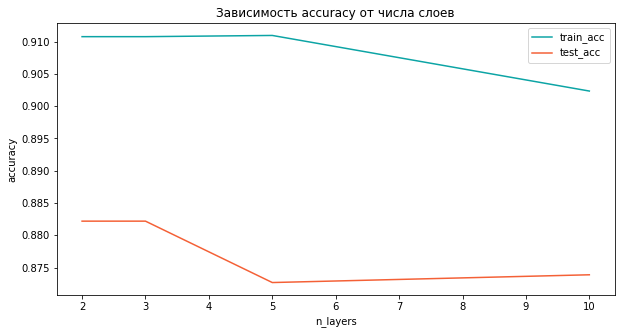

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(result['n_layers'], result['train_acc'], label='train_acc', c='#0CA4A5')
plt.plot(result['n_layers'], result['test_acc'], label='test_acc', c='#F46036')

plt.title('Зависимость accuracy от числа слоев')
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

С увеличением количества слоев метрика имеет тенденцию снижаться.

#### Задание 2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

Оптимизатор - SGD: Accuracy на трейне - 0.859854; Accuracy на тесте - 0.841300.
Оптимизатор - Adagrad: Accuracy на трейне - 0.818917; Accuracy на тесте - 0.807800.
Оптимизатор - RMSProp: Accuracy на трейне - 0.917354; Accuracy на тесте - 0.876500.
Оптимизатор - adam: Accuracy на трейне - 0.920042; Accuracy на тесте - 0.881100.


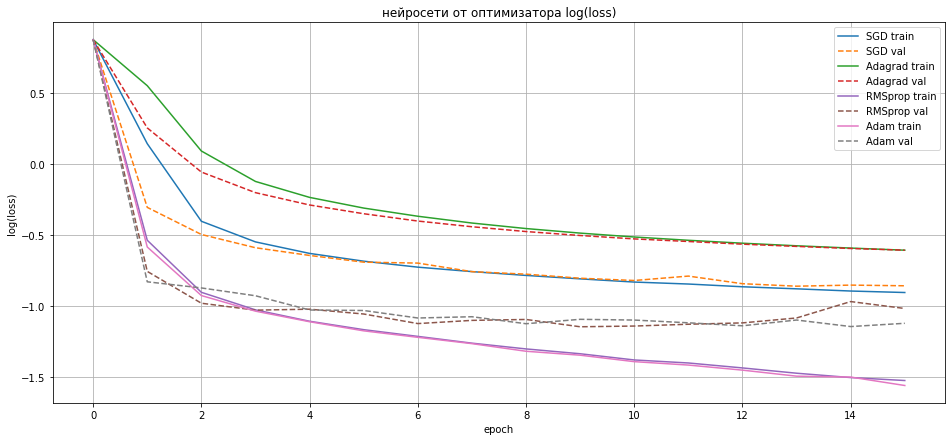

In [68]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15

# вектор для вывода результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

for i_optim in ['SGD', 'Adagrad', 'RMSProp','adam']:
    # зафиксируем random_state
    import tensorflow as tf
    tf.random.set_seed(1)

    # создаем модель model
    model_experiment = Sequential([
        Dense(100, input_shape=(28 * 28,), activation='relu'),                  
        Dense(80, activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    # компилируем modeli с одним из оптимизаторов
    model_experiment.compile(
          optimizer=i_optim,
          loss='categorical_crossentropy',
          metrics=['accuracy'],
          )

    # вычисляем ошибку для modeli без обучения
    hh0_tr = model_experiment.evaluate(X_train[:48000,:], y_train[:48000,:], verbose = 0)
    hh0_val = model_experiment.evaluate(X_train[48000:,:], y_train[48000:],verbose = 0)

    # проводим обучение модели 
    hh = model_experiment.fit(
                      X_train,
                      y_train,
                      epochs=epochs,
                      batch_size=100, 
                      validation_split=0.2, 
                      verbose = 0
                      )

    test_loss, test_acc = model_experiment.evaluate(X_test, y_test, verbose=0)
    print(f'Оптимизатор - {i_optim}: '
            f'Accuracy на трейне - {hh.history.get("accuracy")[-1]:.6f}; '
            f'Accuracy на тесте - {test_acc:.6f}.')

    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = model_experiment.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = model_experiment.optimizer.get_config()['name']+' val')



plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

Очевидно, что наилучшая (наименьшая) метрика достигается при использовании оптимизатора Adam.

#### Задание 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Улучшению качества классификации поспособствовало:  
Увеличение числа нейронов,   
Увеличение числа эпох (аккуратное увеличение до 10, т.к. может начаться переобучение).   
Калибровка количества слоев (в данной задаче оказалось, что 2х слойной нейронной сети достаточно, чтобы получить неплохой результат с наименьшим переобучением)  
Увеличение размера batch_size

In [88]:
#Дополнительно попробуем изучить влияние на величину метрики количества эпох

epochs = [7, 10, 12, 15, 20, 30]
for epoch in epochs:

    model_exp_epochs = Sequential([
        Dense(100, input_shape=(28 * 28,), activation='relu'),                  
        Dense(80, activation='relu'),
        Dense(10, activation='sigmoid')
    ])
    print(f'Количество эпох - {epoch}')
    train_acc, test_acc = evaluate_model(model_exp_epochs, epochs=epoch)  
    print()

Количество эпох - 7
Model <keras.engine.sequential.Sequential object at 0x7f74600b86d0> -  Accuracy train: 0.8967, accuracy test: 0.8722

Количество эпох - 10
Model <keras.engine.sequential.Sequential object at 0x7f746eeb9e10> -  Accuracy train: 0.9061, accuracy test: 0.8771

Количество эпох - 12
Model <keras.engine.sequential.Sequential object at 0x7f746f39ef50> -  Accuracy train: 0.9120, accuracy test: 0.8794

Количество эпох - 15
Model <keras.engine.sequential.Sequential object at 0x7f746f32cd50> -  Accuracy train: 0.9193, accuracy test: 0.8775

Количество эпох - 20
Model <keras.engine.sequential.Sequential object at 0x7f746f1b2210> -  Accuracy train: 0.9305, accuracy test: 0.8830

Количество эпох - 30
Model <keras.engine.sequential.Sequential object at 0x7f745b352390> -  Accuracy train: 0.9467, accuracy test: 0.8773



Вывод: с увеличением количества эпох существенно растет метрика на тренировочных данных и очень незначительно на тестовых -> увеличивается переобучение (на количестве 30 метрика на тренировочных данных достигает почти 100% , а на тесте 0.88.., налицо сильнейшее переобучение). Для данной задачи оптимально 10 эпох, сохраняя неплохую метрику и минимальное переобучение

#### Задание 4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [89]:
model_fin = Sequential([
    Dense(100, input_shape=(28 * 28,), activation='relu'),                  
    Dense(80, activation='relu'),
    Dense(10, activation='sigmoid')
])


train_acc, test_acc = evaluate_model(model_fin, epochs=10) 

Model <keras.engine.sequential.Sequential object at 0x7f745b12f310> -  Accuracy train: 0.9061, accuracy test: 0.8778


In [90]:
N = 5
y_pred = model_fin.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

In [91]:
y_pred[1], y_pred_labels[1]

(array([8.8990092e-01, 1.3667345e-04, 9.9999404e-01, 7.4170828e-03,
        9.9927098e-01, 5.8620483e-08, 9.9329716e-01, 9.6037991e-05,
        2.3870766e-03, 2.2562137e-06], dtype=float32), 2)

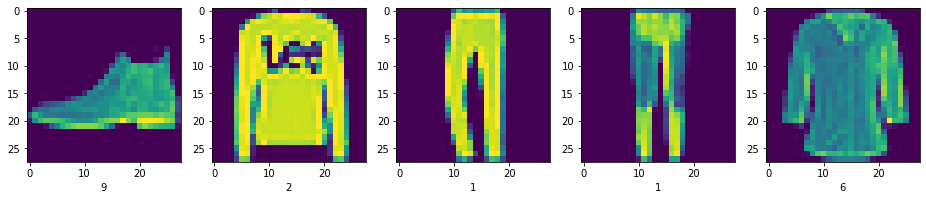

In [92]:
plt.figure(figsize=(16, 4))
for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(X_test[i,:].reshape(28, 28))
    plt.xlabel(str(y_pred_labels[i]))
plt.show()

In [93]:
y_pred_labels[:5], y_test_labels[:5]

(array([9, 2, 1, 1, 6]), array([9, 2, 1, 1, 6], dtype=uint8))

In [94]:
confusion_matrix(y_test_labels, y_pred_labels)

array([[832,   5,  28,  30,   8,   0,  86,   0,  11,   0],
       [  1, 980,   0,  13,   3,   0,   2,   0,   1,   0],
       [ 10,   2, 745,  10, 177,   0,  55,   0,   1,   0],
       [ 15,  18,  16, 869,  57,   0,  21,   0,   4,   0],
       [  0,   1,  58,  15, 877,   0,  46,   0,   3,   0],
       [  0,   0,   0,   0,   0, 963,   0,  22,   2,  13],
       [131,   3,  87,  29,  96,   0, 645,   0,   9,   0],
       [  0,   0,   0,   0,   0,  26,   0, 948,   1,  25],
       [  3,   0,   4,   4,  10,   2,   6,   3, 968,   0],
       [  0,   0,   0,   0,   0,   6,   1,  42,   0, 951]])

In [95]:
y_test_labels.shape, y_pred_labels.shape

((10000,), (10000,))

Найдем precision, recall и f1 по классам

In [96]:
precision_score(y_test_labels, y_pred_labels, labels = np.unique(y_test_labels), average = None)

array([0.83870968, 0.97125867, 0.79424307, 0.89587629, 0.71416938,
       0.96589769, 0.74825986, 0.93399015, 0.968     , 0.96157735])

In [97]:
recall_score(y_test_labels, y_pred_labels, labels = np.unique(y_test_labels), average = None)

array([0.832, 0.98 , 0.745, 0.869, 0.877, 0.963, 0.645, 0.948, 0.968,
       0.951])

In [98]:
f1_score(y_test_labels, y_pred_labels, labels=np.unique(y_test_labels), average=None)

array([0.83534137, 0.97560976, 0.76883385, 0.8822335 , 0.78725314,
       0.96444667, 0.69280344, 0.94094293, 0.968     , 0.95625943])

Метрики неплохие, но явно проседает класс 6, метрика f1 score 0.70, что мало относительно других классов